In [ ]:
# Import Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [29]:
# Read in Tesla Data

tesla_df = pd.read_csv(Path('Stock_Predictor_Python/TSLA.csv'),index_col = 'Date', parse_dates = True, infer_datetime_format = True)

tesla_df.head

<bound method NDFrame.head of                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2010-07-01   5.000000   5.184000   4.054000   4.392000   4.392000  41094000
2010-07-02   4.600000   4.620000   3.742000   3.840000   3.840000  25699000
2010-07-06   4.000000   4.000000   3.166000   3.222000   3.222000  34334500
2010-07-07   3.280000   3.326000   2.996000   3.160000   3.160000  34608500
2010-07-08   3.228000   3.504000   3.114000   3.492000   3.492000  38557000
...               ...        ...        ...        ...        ...       ...
2019-12-24  83.671997  85.094002  82.538002  85.050003  85.050003  40273500
2019-12-26  85.582001  86.695999  85.269997  86.188004  86.188004  53169500
2019-12-27  87.000000  87.061996  85.222000  86.075996  86.075996  49728500
2019-12-30  85.758003  85.800003  81.851997  82.940002  82.940002  62932000
2019-12-31  81.000000  84.258003  80.416000  83.666000  83

In [ ]:
# EXTRACTION - 
# - shape is rows and columns

In [30]:
tesla_df.shape

(2392, 6)

In [32]:
tesla_df = tesla_df['Open'].values
tesla_df = tesla_df.reshape(-1, 1)

In [33]:
tesla_df.shape

(2392, 1)

In [36]:
dataset_train = np.array(tesla_df[:int(tesla_df.shape[0]*0.8)])
dataset_test = np.array(tesla_df[int(tesla_df.shape[0]*0.8):])
print(dataset_train.shape)
print(dataset_test.shape)

(1913, 1)
(479, 1)


In [ ]:
# Importing Model

In [39]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [ ]:
# Scaling Data

In [40]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.0239104 ],
       [0.01851302],
       [0.01041695],
       [0.00070166],
       [0.        ]])

In [41]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.8340845 ],
       [0.87127243],
       [0.88293085],
       [0.81983541],
       [0.80958041]])

In [46]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y 

In [ ]:
# Creating training and testing datasets:

In [47]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [ ]:
# creating our LSTM model

In [48]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
# Reshape features for the LSTM layer:

In [49]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [50]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
#start the training

In [51]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
59/59 [==============================] - 30s 229ms/step - loss: 0.0177
Epoch 2/50
59/59 [==============================] - 14s 229ms/step - loss: 0.0031
Epoch 3/50
59/59 [==============================] - 13s 225ms/step - loss: 0.0031
Epoch 4/50
59/59 [==============================] - 13s 215ms/step - loss: 0.0031
Epoch 5/50
59/59 [==============================] - 13s 215ms/step - loss: 0.0031
Epoch 6/50
59/59 [==============================] - 12s 210ms/step - loss: 0.0028
Epoch 7/50
59/59 [==============================] - 13s 213ms/step - loss: 0.0032
Epoch 8/50
59/59 [==============================] - 13s 213ms/step - loss: 0.0026
Epoch 9/50
59/59 [==============================] - 12s 205ms/step - loss: 0.0024
Epoch 10/50
59/59 [==============================] - 12s 199ms/step - loss: 0.0022
Epoch 11/50
59/59 [==============================] - 12s 204ms/step - loss: 0.0021
Epoch 12/50
59/59 [==============================] - 11s 191ms/step - loss: 0.0024
Epoch 13/50
5

In [52]:
model = load_model('stock_prediction.h5')

14/14 [==============================] - 4s 64ms/step


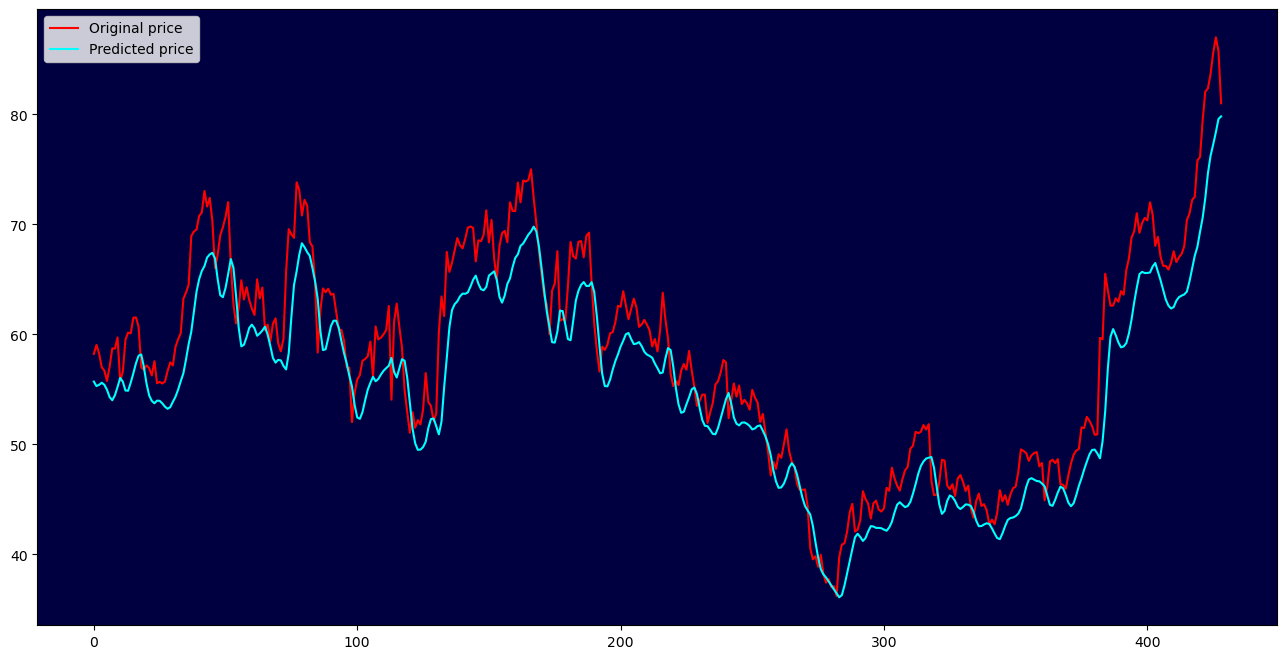

In [53]:
#Results Visulalisation

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()
